# Part 2: outlier regions


In [26]:
import pandas as pd

# Load the datasets
vaccination_data = pd.read_csv('/content/us_state_vaccinations.csv')
deaths_data = pd.read_csv('/content/time_series_covid19_deaths_US.csv')
confirmed_cases_data = pd.read_csv('/content/time_series_covid19_confirmed_US.csv')

# Display the first few rows of each dataset to understand their structure
(vaccination_data.head(), deaths_data.head(), confirmed_cases_data.head())


(         date location  total_vaccinations  total_distributed  \
 0  2021-01-12  Alabama             78134.0           377025.0   
 1  2021-01-13  Alabama             84040.0           378975.0   
 2  2021-01-14  Alabama             92300.0           435350.0   
 3  2021-01-15  Alabama            100567.0           444650.0   
 4  2021-01-16  Alabama                 NaN                NaN   
 
    people_vaccinated  people_fully_vaccinated_per_hundred  \
 0            70861.0                                 0.15   
 1            74792.0                                 0.19   
 2            80480.0                                  NaN   
 3            86956.0                                 0.28   
 4                NaN                                  NaN   
 
    total_vaccinations_per_hundred  people_fully_vaccinated  \
 0                            1.59                   7270.0   
 1                            1.71                   9245.0   
 2                            1.88     

In [44]:
# Check the column names in both deaths and cases datasets to identify the correct date format
deaths_column_names = deaths_data.columns
cases_column_names = confirmed_cases_data.columns

(deaths_column_names, cases_column_names)


(Index(['UID', 'iso2', 'iso3', 'code3', 'FIPS', 'Admin2', 'Province_State',
        'Country_Region', 'Lat', 'Long_',
        ...
        '2/28/23', '3/1/23', '3/2/23', '3/3/23', '3/4/23', '3/5/23', '3/6/23',
        '3/7/23', '3/8/23', '3/9/23'],
       dtype='object', length=1155),
 Index(['UID', 'iso2', 'iso3', 'code3', 'FIPS', 'Admin2', 'Province_State',
        'Country_Region', 'Lat', 'Long_',
        ...
        '2/28/23', '3/1/23', '3/2/23', '3/3/23', '3/4/23', '3/5/23', '3/6/23',
        '3/7/23', '3/8/23', '3/9/23'],
       dtype='object', length=1154))

In [31]:
# Correctly filter columns based on the date format 'm/d/yy' which is identified from the dataset
date_columns = [col for col in deaths_data.columns if '/' in col]  # Date columns contain '/'

# Filter the datasets using the identified date columns
deaths_by_state_dates = deaths_by_state[date_columns]
cases_by_state_dates = cases_by_state[date_columns]

# Display the filtered datasets to ensure correct structure
(deaths_by_state_dates.head(), cases_by_state_dates.head())


(                1/22/20  1/23/20  1/24/20  1/25/20  1/26/20  1/27/20  1/28/20  \
 Province_State                                                                  
 Alabama               0        0        0        0        0        0        0   
 Alaska                0        0        0        0        0        0        0   
 American Samoa        0        0        0        0        0        0        0   
 Arizona               0        0        0        0        0        0        0   
 Arkansas              0        0        0        0        0        0        0   
 
                 1/29/20  1/30/20  1/31/20  ...  2/28/23  3/1/23  3/2/23  \
 Province_State                             ...                            
 Alabama               0        0        0  ...    20932   21001   21001   
 Alaska                0        0        0  ...     1486    1486    1486   
 American Samoa        0        0        0  ...       34      34      34   
 Arizona               0        0        0  

In [30]:
# Aggregate daily vaccination data to match the state-level granularity
vaccination_data['date'] = pd.to_datetime(vaccination_data['date'])
vaccination_state_daily = vaccination_data.groupby(['location', 'date']).sum()

# Pivot vaccination data for compatibility with cases and deaths data
vaccination_state_pivot = vaccination_state_daily.pivot_table(
    index='date',
    columns='location',
    values='people_fully_vaccinated_per_hundred',
    aggfunc='sum'
)

# Fill missing values with the previous day's data (forward fill)
vaccination_state_pivot.ffill(inplace=True)

# Display the prepared vaccination data
vaccination_state_pivot.head()


location,Alabama,Alaska,American Samoa,Arizona,Arkansas,Bureau of Prisons,California,Colorado,Connecticut,Delaware,...,United States,Utah,Vermont,Veterans Health,Virgin Islands,Virginia,Washington,West Virginia,Wisconsin,Wyoming
date,,,,,,,,,,,,,,,,,,,,,
2020-12-20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-12-21,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-12-22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-12-23,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-12-24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [36]:
# Check the state names in the datasets to identify how "California" is labeled
state_names_deaths = deaths_by_state_dates.columns
state_names_cases = cases_by_state_dates.columns
state_names_vaccinations = vaccination_state_pivot.columns

(state_names_deaths, state_names_cases, state_names_vaccinations)


(Index(['1/22/20', '1/23/20', '1/24/20', '1/25/20', '1/26/20', '1/27/20',
        '1/28/20', '1/29/20', '1/30/20', '1/31/20',
        ...
        '2/28/23', '3/1/23', '3/2/23', '3/3/23', '3/4/23', '3/5/23', '3/6/23',
        '3/7/23', '3/8/23', '3/9/23'],
       dtype='object', length=1143),
 Index(['1/22/20', '1/23/20', '1/24/20', '1/25/20', '1/26/20', '1/27/20',
        '1/28/20', '1/29/20', '1/30/20', '1/31/20',
        ...
        '2/28/23', '3/1/23', '3/2/23', '3/3/23', '3/4/23', '3/5/23', '3/6/23',
        '3/7/23', '3/8/23', '3/9/23'],
       dtype='object', length=1143),
 Index(['Alabama', 'Alaska', 'American Samoa', 'Arizona', 'Arkansas',
        'Bureau of Prisons', 'California', 'Colorado', 'Connecticut',
        'Delaware', 'Dept of Defense', 'District of Columbia',
        'Federated States of Micronesia', 'Florida', 'Georgia', 'Guam',
        'Hawaii', 'Idaho', 'Illinois', 'Indian Health Svc', 'Indiana', 'Iowa',
        'Kansas', 'Kentucky', 'Long Term Care', 'Louisiana',

<ipython-input-39-ddcd535ae083>:2: UserWarning:

Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.

<ipython-input-39-ddcd535ae083>:3: UserWarning:

Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.



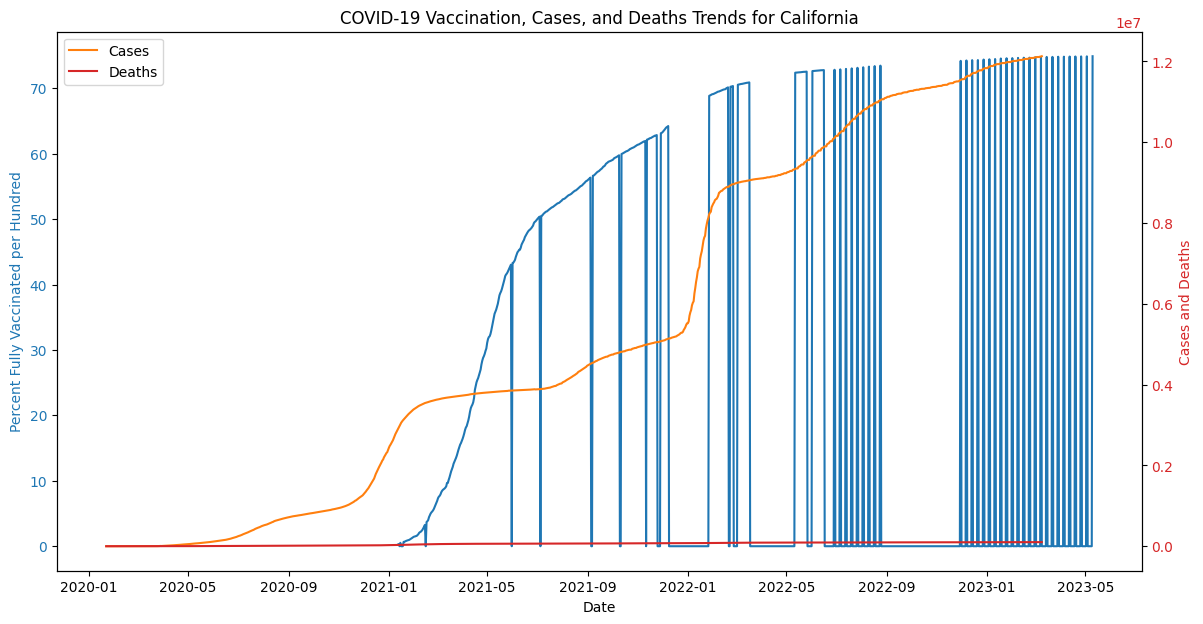

In [39]:
# Convert indices for cases and deaths to datetime for proper plotting
california_deaths.index = pd.to_datetime(california_deaths.index)
california_cases.index = pd.to_datetime(california_cases.index)

# Replot with the indices converted to datetime
fig, ax1 = plt.subplots(figsize=(14, 7))

# Plotting vaccination data
color = 'tab:blue'
ax1.set_xlabel('Date')
ax1.set_ylabel('Percent Fully Vaccinated per Hundred', color=color)
ax1.plot(california_vaccinations.index, california_vaccinations, color=color)
ax1.tick_params(axis='y', labelcolor=color)

# Creating a second y-axis to plot cases and deaths data
ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('Cases and Deaths', color=color)
ax2.plot(california_cases.index, california_cases, color='tab:orange', label='Cases')
ax2.plot(california_deaths.index, california_deaths, color=color, label='Deaths')
ax2.tick_params(axis='y', labelcolor=color)
ax2.legend(loc='upper left')

# Title
plt.title(f'COVID-19 Vaccination, Cases, and Deaths Trends for {state}')

# Show plot
plt.show()
